<h2 style="color : #004080;"><span style="text-decoration : underline">Exercice 1 :</span>Analyse des données de fabrication de ciment</h2>

In [24]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

<h2> 1. Prétraitement des données </h2>

In [25]:
df = pd.read_excel('./data/exercice_1/data_Ciment.xlsx', sheet_name=0)
df.isnull().sum()

A     71
B      2
C      2
D      7
E     13
F      2
G      2
H      2
I      2
J     30
K      2
L      2
M      1
N      2
O      2
P      2
Q      2
R     74
S      2
T      2
U      2
V     74
W      2
X     74
Y      2
Z      2
AA     2
AB     2
AV     2
AD     2
AE     2
AF     2
AG     2
AH     2
AI     2
AJ     2
AK     2
AL     2
AM     2
AN     2
AO     2
AP     2
AQ     2
AR     2
dtype: int64

### Renommer les colonnes

In [26]:
df1 = pd.read_excel('./data/exercice_1/data_Ciment.xlsx', sheet_name=1, usecols=[0, 1], nrows=44, header=None)
columns = {}
for col in df1.to_dict(orient='records'):
    columns[col[0]] = col[1]
df.rename(columns=columns, inplace=True)
df.head()

,date,hour,feeding scale,Free calcium,Eligibility test,kiln speed,kiln head scale,kiln tailor scale,Body temperature,the top tempreture of the primary pre-heator,...,the pressure of the primary part in clinker cooler,the S1 of the primary part in clinker cooler,the I1 of the primary part inclinker cooler,the S1 of the secondary part inclinker cooler,the I1 of the secondary part inclinker cooler,the S1 of the third part inclinker cooler,the I1 of the third part in clinker cooler,the pressure of the third fan,the rotation speed of the high tempreture van,the current of the high tempreture van
0,20170311.0,00:00:00,410.0,0.44,Y,3.9,14.5,20.5,374.0,381.0,...,6.0,9.5,52.0,16.0,61.0,20.0,71.0,0.4,920.0,339.0
1,NaN,01:00:00,410.0,11.28,N,3.9,14.5,20.5,371.0,382.0,...,6.0,9.5,51.0,16.0,61.0,20.0,70.0,0.4,920.0,341.0
2,NaN,02:00:00,410.0,0.65,Y,3.9,14.0,20.5,368.0,387.0,...,6.0,9.5,51.0,16.0,62.0,20.0,72.0,0.4,920.0,343.0
3,NaN,03:00:00,410.0,0.69,Y,3.9,14.0,20.5,371.0,385.0,...,6.0,9.5,53.0,16.0,63.0,20.0,70.0,0.4,920.0,341.0
4,NaN,04:00:00,410.0,0.65,Y,3.9,14.0,20.5,371.0,398.0,...,6.0,9.5,53.0,16.0,60.0,20.0,70.0,0.4,920.0,338.0


### Identification des colonnes nulles

<Axes: >

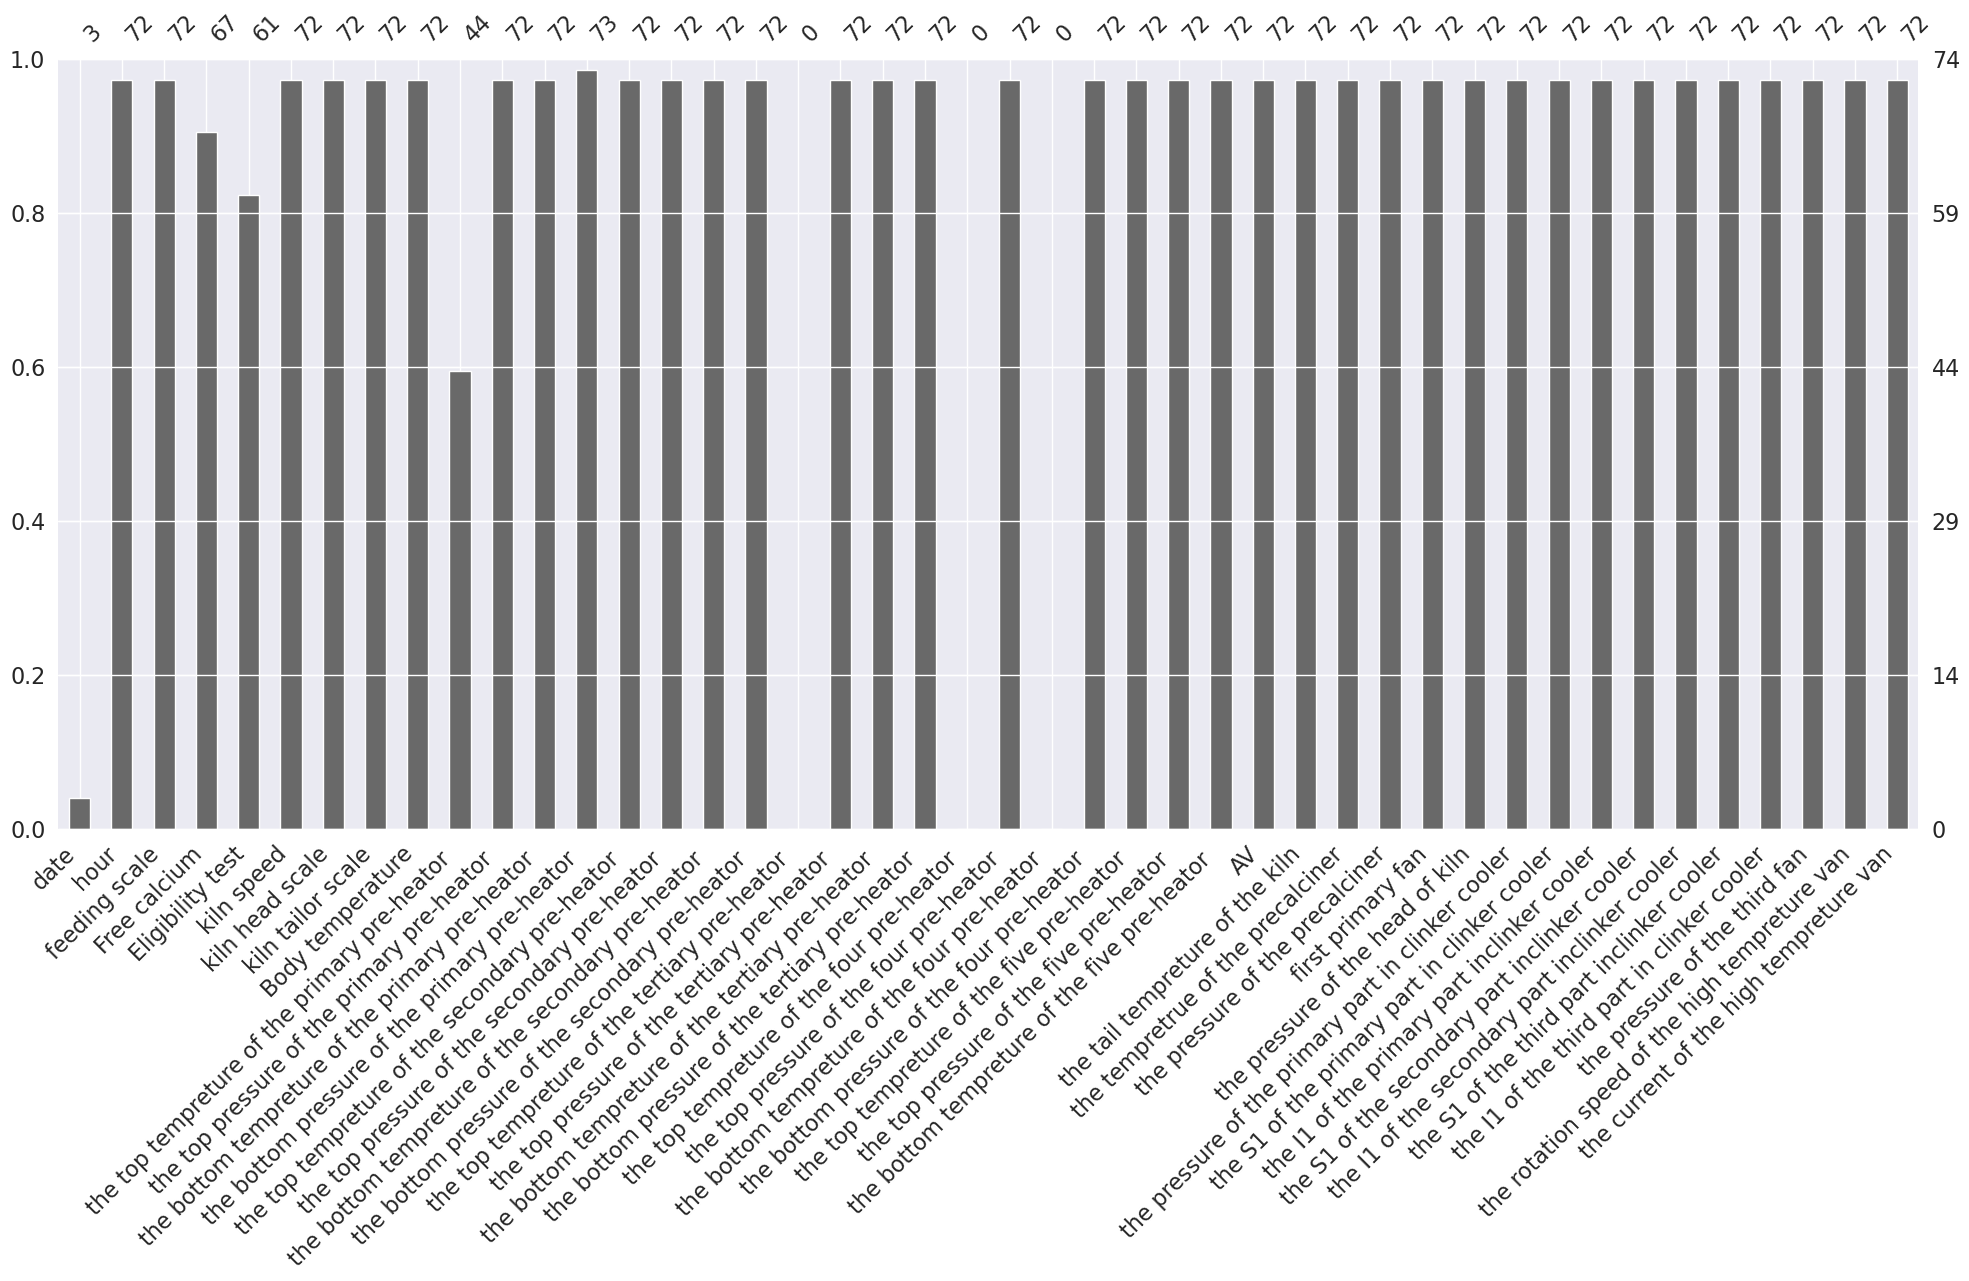

In [27]:
msno.bar(df)

### Identification et suppression des colonnes constantes et null

In [28]:
for col in df.columns:
    nb_value = df[col].nunique()
    if nb_value <= 1:
        df.drop(axis=0, columns=[col], inplace=True)
        print(f"Colonne \"{col}\" supprimée")

Colonne "the top tempreture of the tertiary pre-heator " supprimée
Colonne "the top tempreture of the four pre-heator " supprimée
Colonne "the bottom tempreture of the four pre-heator " supprimée
Colonne "the pressure of the head of kiln" supprimée
Colonne "the pressure of the primary part in clinker cooler" supprimée
Colonne "the rotation speed of the high tempreture van" supprimée


In [29]:
#Pourcentage de donnees manquantes
col_missing_pct = (df.isna().sum()/df.shape[0])*100
col_missing_pct.sort_values(ascending=False)

date                                                  95.945946
the top tempreture of the primary pre-heator          40.540541
Eligibility test                                      17.567568
Free calcium                                           9.459459
feeding scale                                          2.702703
hour                                                   2.702703
kiln speed                                             2.702703
kiln head scale                                        2.702703
kiln tailor scale                                      2.702703
Body temperature                                       2.702703
the top pressure of the primary pre-heator             2.702703
the bottom tempreture of the primary pre-heator        2.702703
the top tempreture of the secondary pre-heator         2.702703
the top pressure of the secondary pre-heator           2.702703
the bottom tempreture of the tertiary pre-heator       2.702703
the bottom tempreture of the secondary p

### Identification et suppression des colonnes inutile

In [30]:
# Suppression de la colonne Date
df.drop(df.columns[0], axis=1, inplace=True)

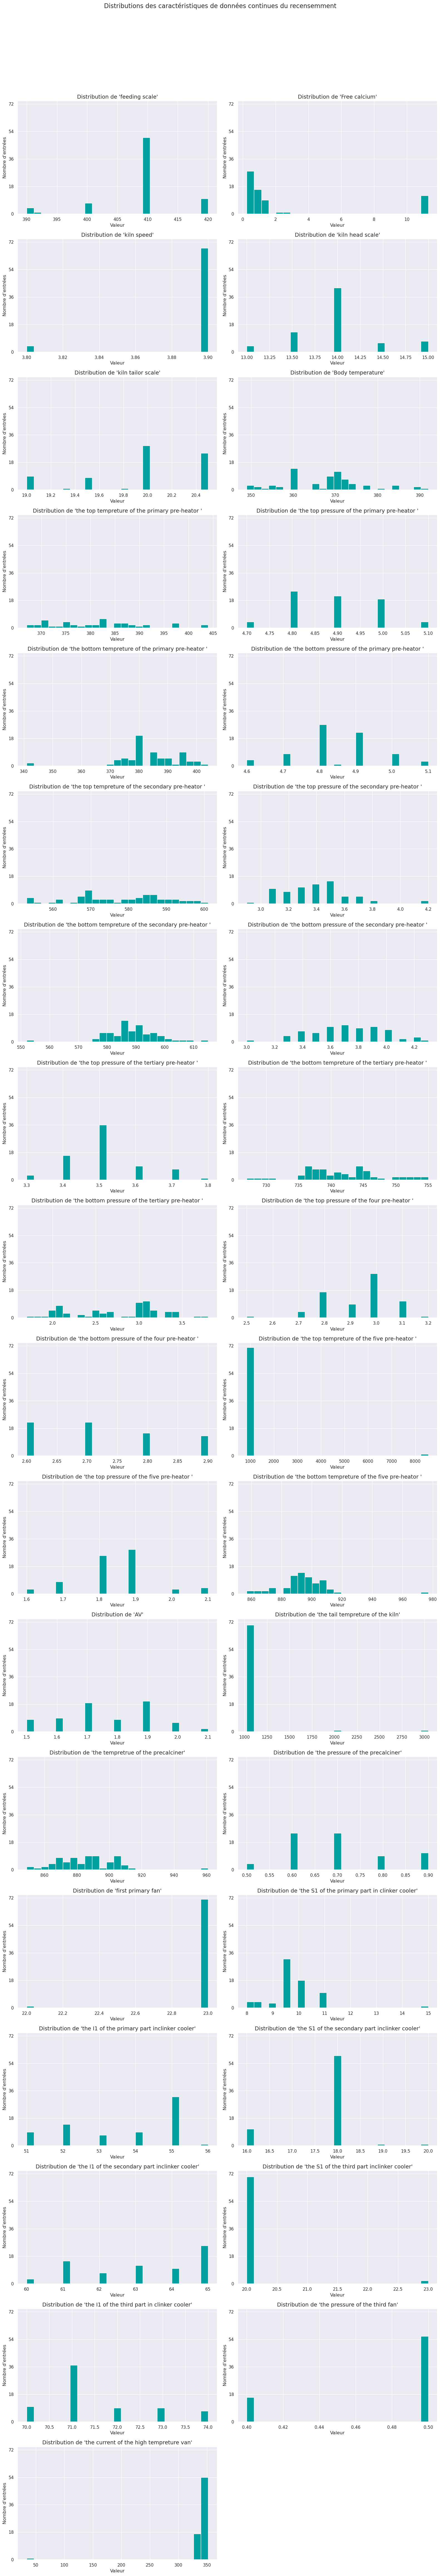

In [31]:
# Vérifier l'asymétrie des données numériques dans le jeu de données
num_col = df.dtypes[df.dtypes != 'object'].index

# Calculate the number of rows needed for the subplots
num_features = len(num_col)
rows = (num_features + 1) // 2  # Two columns per row

# Create the figure
fig = plt.figure(figsize=(16, rows * 5))

# Affichage de l'asymétrie des données
for i, feature in enumerate(df[num_col]):
    ax = fig.add_subplot(rows, 2, i+1)
    ax.hist(df[feature], bins = 25, color = '#00A0A0')
    ax.set_title("Distribution de '%s'"%(feature), fontsize = 14)
    ax.set_xlabel("Valeur")
    ax.set_ylabel("Nombre d'entrées")
    ax.set_ylim((0, df.shape[0]))
    ax.set_yticks([b for b in range(0, df.shape[0], max(1, df.shape[0] // 4))])
    # ax.set_yticklabels([b for b in range(0, df.shape[0], df.shape[0]/4)])

# Tracé aesthetics
fig.suptitle("Distributions des caractéristiques de données continues du recensemment", fontsize = 16, y = 1.03)

fig.tight_layout()
plt.show()

In [32]:
# Calcul de l'asymétrie et ordonancer
skew_feats = df[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
the top tempreture of the five pre-heator,8.481305
the tail tempreture of the kiln,6.760096
the S1 of the third part inclinker cooler,5.870056
the S1 of the primary part in clinker cooler,2.133597
Free calcium,1.676016
the bottom tempreture of the five pre-heator,1.472903
the top pressure of the secondary pre-heator,0.915814
the tempretrue of the precalciner,0.862190
the I1 of the third part in clinker cooler,0.843477
the top tempreture of the primary pre-heator,0.587520


In [33]:
df.describe()

,feeding scale,Free calcium,kiln speed,kiln head scale,kiln tailor scale,Body temperature,the top tempreture of the primary pre-heator,the top pressure of the primary pre-heator,the bottom tempreture of the primary pre-heator,the bottom pressure of the primary pre-heator,...,the pressure of the precalciner,first primary fan,the S1 of the primary part in clinker cooler,the I1 of the primary part inclinker cooler,the S1 of the secondary part inclinker cooler,the I1 of the secondary part inclinker cooler,the S1 of the third part inclinker cooler,the I1 of the third part in clinker cooler,the pressure of the third fan,the current of the high tempreture van
count,72.000000,67.000000,72.000000,72.000000,72.000000,72.000000,44.000000,72.000000,72.000000,73.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,409.055556,2.668209,3.894444,13.993056,19.973611,367.638889,381.522727,4.893056,383.763889,4.843056,...,0.698611,22.986111,9.750000,53.611111,17.736111,63.194444,20.083333,71.527778,0.477778,337.861111
std,7.080799,4.058499,0.023067,0.470937,0.496181,9.454570,9.643623,0.102540,10.698813,0.112825,...,0.114441,0.117851,0.967791,1.543323,0.787098,1.683716,0.496466,1.174521,0.041866,36.536420
min,390.000000,0.240000,3.800000,13.000000,19.000000,349.000000,367.000000,4.700000,341.000000,4.600000,...,0.500000,22.000000,8.000000,51.000000,16.000000,60.000000,20.000000,70.000000,0.400000,34.000000
25%,410.000000,0.570000,3.900000,14.000000,19.725000,361.000000,374.750000,4.800000,379.000000,4.800000,...,0.600000,23.000000,9.500000,52.000000,18.000000,61.750000,20.000000,71.000000,0.500000,339.750000
50%,410.000000,0.730000,3.900000,14.000000,20.000000,368.000000,381.500000,4.900000,382.500000,4.800000,...,0.700000,23.000000,9.500000,54.000000,18.000000,63.000000,20.000000,71.000000,0.500000,341.000000
75%,410.000000,1.330000,3.900000,14.000000,20.500000,372.000000,387.000000,5.000000,389.250000,4.900000,...,0.800000,23.000000,10.000000,55.000000,18.000000,65.000000,20.000000,72.000000,0.500000,345.000000
max,420.000000,11.300000,3.900000,15.000000,20.500000,392.000000,404.000000,5.100000,404.000000,5.100000,...,0.900000,23.000000,15.000000,56.000000,20.000000,65.000000,23.000000,74.000000,0.500000,352.000000


In [34]:
df.head()

,hour,feeding scale,Free calcium,Eligibility test,kiln speed,kiln head scale,kiln tailor scale,Body temperature,the top tempreture of the primary pre-heator,the top pressure of the primary pre-heator,...,the pressure of the precalciner,first primary fan,the S1 of the primary part in clinker cooler,the I1 of the primary part inclinker cooler,the S1 of the secondary part inclinker cooler,the I1 of the secondary part inclinker cooler,the S1 of the third part inclinker cooler,the I1 of the third part in clinker cooler,the pressure of the third fan,the current of the high tempreture van
0,00:00:00,410.0,0.44,Y,3.9,14.5,20.5,374.0,381.0,4.8,...,0.6,23.0,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0
1,01:00:00,410.0,11.28,N,3.9,14.5,20.5,371.0,382.0,4.8,...,0.6,23.0,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0
2,02:00:00,410.0,0.65,Y,3.9,14.0,20.5,368.0,387.0,4.8,...,0.6,23.0,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0
3,03:00:00,410.0,0.69,Y,3.9,14.0,20.5,371.0,385.0,4.9,...,0.6,23.0,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0
4,04:00:00,410.0,0.65,Y,3.9,14.0,20.5,371.0,398.0,4.9,...,0.7,23.0,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0


### Transformer les colonnes "Eligibility test" et "hour"

In [35]:
df[df.columns[3]] = df[df.columns[3]].apply(lambda x: 1 if (x=="Y") else 0)

In [36]:
df.head()

,hour,feeding scale,Free calcium,Eligibility test,kiln speed,kiln head scale,kiln tailor scale,Body temperature,the top tempreture of the primary pre-heator,the top pressure of the primary pre-heator,...,the pressure of the precalciner,first primary fan,the S1 of the primary part in clinker cooler,the I1 of the primary part inclinker cooler,the S1 of the secondary part inclinker cooler,the I1 of the secondary part inclinker cooler,the S1 of the third part inclinker cooler,the I1 of the third part in clinker cooler,the pressure of the third fan,the current of the high tempreture van
0,00:00:00,410.0,0.44,1,3.9,14.5,20.5,374.0,381.0,4.8,...,0.6,23.0,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0
1,01:00:00,410.0,11.28,0,3.9,14.5,20.5,371.0,382.0,4.8,...,0.6,23.0,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0
2,02:00:00,410.0,0.65,1,3.9,14.0,20.5,368.0,387.0,4.8,...,0.6,23.0,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0
3,03:00:00,410.0,0.69,1,3.9,14.0,20.5,371.0,385.0,4.9,...,0.6,23.0,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0
4,04:00:00,410.0,0.65,1,3.9,14.0,20.5,371.0,398.0,4.9,...,0.7,23.0,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0


In [37]:
df.dropna(subset=[df.columns[0]], inplace=True)

df[df.columns[0]]=df[df.columns[0]].apply(lambda x: str(x).split(':')[0])

df['hour_sin'] = np.sin(2 * np.pi * df[df.columns[0]].astype(int) / 24)
df['hour_cos'] = np.cos(2 * np.pi * df[df.columns[0]].astype(int) / 24)

df.head()

,hour,feeding scale,Free calcium,Eligibility test,kiln speed,kiln head scale,kiln tailor scale,Body temperature,the top tempreture of the primary pre-heator,the top pressure of the primary pre-heator,...,the S1 of the primary part in clinker cooler,the I1 of the primary part inclinker cooler,the S1 of the secondary part inclinker cooler,the I1 of the secondary part inclinker cooler,the S1 of the third part inclinker cooler,the I1 of the third part in clinker cooler,the pressure of the third fan,the current of the high tempreture van,hour_sin,hour_cos
0,00,410.0,0.44,1,3.9,14.5,20.5,374.0,381.0,4.8,...,9.5,52.0,16.0,61.0,20.0,71.0,0.4,339.0,0.000000,1.000000
1,01,410.0,11.28,0,3.9,14.5,20.5,371.0,382.0,4.8,...,9.5,51.0,16.0,61.0,20.0,70.0,0.4,341.0,0.258819,0.965926
2,02,410.0,0.65,1,3.9,14.0,20.5,368.0,387.0,4.8,...,9.5,51.0,16.0,62.0,20.0,72.0,0.4,343.0,0.500000,0.866025
3,03,410.0,0.69,1,3.9,14.0,20.5,371.0,385.0,4.9,...,9.5,53.0,16.0,63.0,20.0,70.0,0.4,341.0,0.707107,0.707107
4,04,410.0,0.65,1,3.9,14.0,20.5,371.0,398.0,4.9,...,9.5,53.0,16.0,60.0,20.0,70.0,0.4,338.0,0.866025,0.500000
